<a href="https://colab.research.google.com/github/jbonesTroy/Intro-to-Machine-Learning/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Convert to DataFrame for easier handling
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Display first 5 rows
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients and intercept
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
intercept = model.intercept_

coefficients, intercept


(     Coefficient
 age    37.904021
 sex  -241.964362
 bmi   542.428759
 bp    347.703844
 s1   -931.488846
 s2    518.062277
 s3    163.419983
 s4    275.317902
 s5    736.198859
 s6     48.670657,
 np.float64(151.34560453985995))

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2, test_r2, train_rmse, test_rmse


(0.5279193863361498,
 0.4526027629719195,
 np.float64(53.558843367230935),
 np.float64(53.85344583676593))

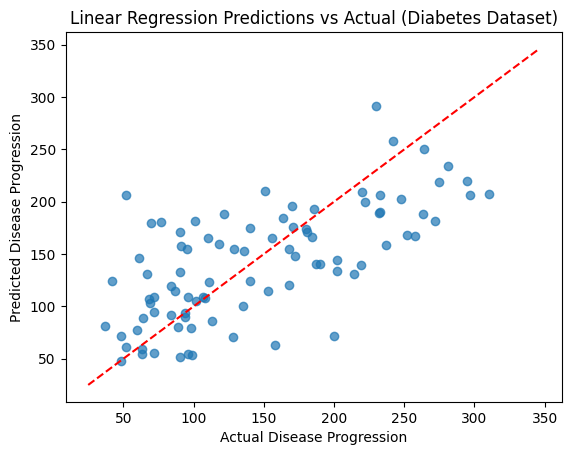

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Linear Regression Predictions vs Actual (Diabetes Dataset)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
